# Neu 560 (2018-02-08): Singular Value Decomposition (SVD)
## Defining SVD
**Singular value decomposition (SVD)** is a useful tool in statistics and neuroscience. Most straightforwardly, SVD is defined for some matrix $A$ as:

> $A = U S V^T$

where $U$ and $V^T$ are orthogonal matrices comprised of columns of left and right singular values, respectively; and $S$ is a diagonal matrix with singular values. (*Singular* values are non-negative. *Orthogonal* matrices are those whose self dot product yields the identity.)

Conceptually, these matrices $U, S, V^T$ are equivalent to mapping a vector $X$ to a second vector $Y$ through a series of three operations:
> 1. Rotation ($V^T$)
> 2. Stretching along cardinal axes ($S$)
> 3. Rotation ($U$)

Note: In $y = Ax = (U S V^T)x$, the order of operations is $V^T \rightarrow S \rightarrow U$.

Importnatly, ff any $s \in S$ is 0, one dimension of $x$ is lost (suppressed) in its transformation to $y$. 

## Inverting SVD
The transformation defined above can also be reversed:

> $x = A^{-1}y = (V S^{-1} U^T)y$

where the diagonal elements of $S^{-1}$ are equivalent to $\frac{1}{s_i}$. This feature allows for an intuitive definition of invertible matrices: any matrix $A$ is invertible if all of its singular values, $S$, are positive (i.e. $S > 0$). If any singular values are 0, then the matrix cannot be inverted given $\frac{1}{0}$.

This feature also allows us to define the **condition number** of a matrix, which is defined as $\frac{s_1}{s_n}$, or the ratio of its largest and smallest singular values. If the condition number is smaller than the floating point error of a digital computer, then SVD will run into no issues. If the condition number is larger than the floating point error, however, then the matrix is **ill-conditioned**. This is in essence due to rounding errors with arbitrarily small numbers, such as $s_i \approx 0$.

## Pseudoinverse
We can also define the pseudoinverse matrix, $A^+$:

> $A^+ = V S^+ U^T$

which is similar to the inverse-SVD defined above but removing all zero elements of $S$. The result of applying the pseudoinverse is a matrix with fewer dimensions than previously started with. The pseudoinverse actually minimizes the Euclidean distance between original vector space and the non-null space.

## *Tall-skinny* and *short-wide* matrices
SVD can be applied to rectangular matrices as well:

> $\underset{NxM}{A} = \underset{MxM}{U} \cdot \underset{MxN}{S} \cdot \underset{NxN}{V^T}$

When $A$ is a *tall-skinny* matrix (i.e. $N > M$), the matrix $A$ is overdetermined and invertible. Specifically, all the rows in $S$ after the $nth$ row will be all zeros, and thus the inverse will act similarly to the pseudoinverse. When $A$ is a *short-wide* matrix (i.e. $N < M$), the matrix $A$ is underdetermined and non-invertible. 

## Simple python example

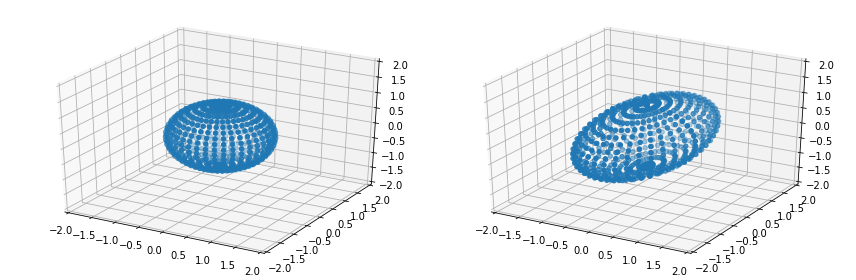

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

## Generate points on a sphere.
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))
X = np.vstack([x.flatten(), y.flatten(), z.flatten()])

## Create simple SVD matrix. Apply.
A = np.identity(3) @ np.diag([1,2,1]) @ np.identity(3).T
Y = A @ X

## Plot.
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(*X)
ax.set(xlim=(-2,2),ylim=(-2,2),zlim=(-2,2))

ax = fig.add_subplot(122, projection='3d')
ax.scatter(*Y)
ax.set(xlim=(-2,2),ylim=(-2,2),zlim=(-2,2))

plt.tight_layout()